<a href="https://colab.research.google.com/github/saptaksubhra/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Airbnb Bookings Analysis







#Project Type - EDA ( Exploratory Data Analysis )
#Contribution - Individual
# Name - Saptaksubhra Bhattacharyya

# Problem Statement:

A problem statement consists of 3 parts from business point of view in general.

* The problem itself
* The method to solve the problem
* The purpose and the scope the author(here, data analyst/ data scientist) is preparing

Here, Airbnb dataset of New York city, 2019 has been given as a problem. The city itself is very famous in the world and lists one of top global destinations to attract visitors to its diverse culture, food, restaurants, museums, entertainment and of course global trade.  Data analysis on thousands of listings provided through Airbnb dataset is a vital factor for the company.
For this project, I am analyzing this Airbnb dataset of New York city, 2019.
I have applied EDA (Exploratory Data Analysis) as method or technique to sort out this problem. My main purpose is to find out the key metrics that influence the listing of properties on the platform. And the hope and scope will be to find out the distribution of every Airbnb listing based on their locations, including their price range, listing names, room type, and other related 
factors.


# Business Context

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>


# What is AirBNB ?

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales and hospitality service for people to lease or rent short-term lodging including holiday cottages, apartments, homestays, hostel beds, or hotel rooms. Basically they provide the platform that is shared by hosts and visitors worldwide. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast. This is an interesting breakdown with its name. Airbnb acts as an intermediary between those who want to rent out space and those who are looking for space to rent. This San-Francisco based startup offers someone’s home as a place to stay.

# Business Objective:

I'll look at each and every variable and do a critical analysis about their meanings and importance for this problem. Through this critical analysis the pros and cons will come out as far as the long term goals of the business have concerned. In order to comprehend the dataset, we can look at each variable and try to make out their meanings and relevance to this problem. I know this is a bit lengthy process, but in the end, it will give us the sweet flavour and fragrance of our dataset. So, without wasting no more time, let's move on step by step


# Initial Setup :

# A.Importing Neccessary Libraries 

# B.Acquiring and Loading Airbnb Dataset

# C. Understanding the dataset

# D.Data Cleaning:

* Dropping duplicates

* Checking the missing values

* Checking outliers in the dataset

* Handling outliers ( Feature Engineering )

* Removing outliers

* Removing redundant or unnecessary columns

* Dealing with missing values

* Checking the NaN values in the dataset

* Remove the NaN values from the dataset

* Checking zero values

* Dealing with invalid data

#E. Exploration and Data Visualization


Questions to be answered :

* What can we learn about different hosts and areas?
* Which hosts are the busiest and why?
* Find out the top 10 hosts with most number of listings in Airbnb NYC dataset.
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

* Find out Total Count of Each Room Type as per Listing.

* What is the average preferred price by the customers in accordance with locations ?

* Where the customers pay the maximum and minimum rent ( in terms of locations ) ?

* What can we learn from predictions? (ex: locations, prices, reviews, etc)

* Find total number of nights spent per room type.

* Find total number of nights spent per location.



# Observations of Columns :

Let's try to make out those columns in detail.

id : unique id to identify Airbnb listing                     
name : Represents the names of the listing                          
host_id :a unique id identifying an airbnb host                           
host_name : name under whom host is registered                     
neighbourhood_group : a group of area               
neighbourhood : area which falls under neighbourhood_group                       
latitude : co-ordinate of listing                             
longitude : co-ordinate of listing                          
room_type : type to categorise listing rooms                           
price : price of listing                              
minimum_nights : The minimum number of nights requierd to pay for in a single visit                    
number_of_reviews : Total number of reviews given by visitors                   
last_review : date of last review given                    
reviews_per_month : rate of reviews given on monthly basis                
calculated_host_listings_count : Total number of listings registered under the name of the host

availability_365 : the number of days for which a host is available around a year


'latitude' and 'longitude' have representation in terms of the co-ordinate system, 'neighbourhood_group', 'neighbourhood' and 'room_type' are categorical type columns. 'last_review' is a column of date type, we will convert it as per requirement. 


# Let's peel off the skin.

#A. **Importing Necessary Libraries**

In this section, the drive is loaded onto the colab platform and then we import the files onto the colab platform.
Let me include the troop of soldiers to embattle this war.







In [1]:
# Importing required libraries first and foremost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




# B. **Acquiring and Loading Airbnb Dataset**

In [2]:
# Mount google drive to have access of the dataset of Airbnb

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Loading data from Airbnb csv file

df_airbnb = pd.read_csv('/content/drive/MyDrive/Almabetter Capstone Projects/AirBNB EDA Project/Airbnb NYC 2019.csv')

In [4]:
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# C.**Understanding the dataset**

In [5]:
# Getting into data to have an overview
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# Checking the number of rows to comprehend the size of the given dataset

len(df_airbnb)

48895

In [7]:
# Checking the number of rows and columns of the dataset
df_airbnb.shape

(48895, 16)

**# Gaining important information of the dataset**

In [8]:
# Checking the data type of each column

df_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
# Checking data types and non-null values count

df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The columns with missing values are **name, host_name, last_review, and reviews_per_month** beacuse these columns are having non-null values less than 48895 (dataframe size).

In [10]:
# Making a copy of the orginal dataset for EDA purpose and as per the standard practice

df_airbnb_copy = df_airbnb.copy()
df_airbnb_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# Dataset copied from the original dataset
df_airbnb_copy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Observations :
# D. **Data Cleaning**

So, it is evident from the dataset that we have 48895 number of rows and 16 columns.  Some columns have null values and missing data. We need to clean those. In the data cleaning step, we Load the dataset into a data frame using Pandas functions,explore the number of rows & columns, ranges of values and then Handle missing, incorrect and invalid data and perform any additional steps ( Dropping duplicates, Checking the missing values, Removing redundant or unnecessary columns, Dealing with missing values,  Checking the NaN values, 
Removing the NaN values from the dataset, Checking zero values and dealing with invalid data ). These steps are explained along with codes.

# Dropping Duplicates

In [12]:
# Checking duplicates in the dataset

df_airbnb_copy.duplicated().sum()



0

In [13]:
# Removing duplicates if any in the dataset

df_airbnb_copy.drop_duplicates(inplace = True)

# Checking the missing values

After checking the information of the dataset we are already able to see NaN values in each column, therefore need to examine missing values further before continuing with the analysis.



In [14]:
# Looking for those columns having null values
# By using sum() function, we will able to see how many null values are present in each column of the dataset

df_airbnb_copy.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# From the above dataset we can observe that :
* The columns with null values are 'name', 'host_name', 'last_review' and 'reviews_per_month'.
* The last two columns ( 'last_review' and 'reviews_per_month' ) are having over 10000 rows of missing values.
* The column 'reviews_per_month' would be interesting to analyze and the better way to deal with this column is to replace all NaN values with zeros.
* The rest 3 columns will not be used for the analysis and should be dropped.

So, let's move on with dropping columns that are unimportnat and handle missing data.

# Checking outliers in the dataset

An outlier is a value that lies at an abnormally high distance from other values in the dataset. It can be much smaller or much larger. Basically, it does not show the same pattern as other values. Data cleaning or data pre-processing involves checking duplicate records and dropping duplicate records, checking missing values. But, very often we overlook another step which is a vital part as far as the data cleaning is concerned and that is detection and removal of outliers. In this scection, detection of outliers will be doen and then we'll get on with the next step and that is removal of outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


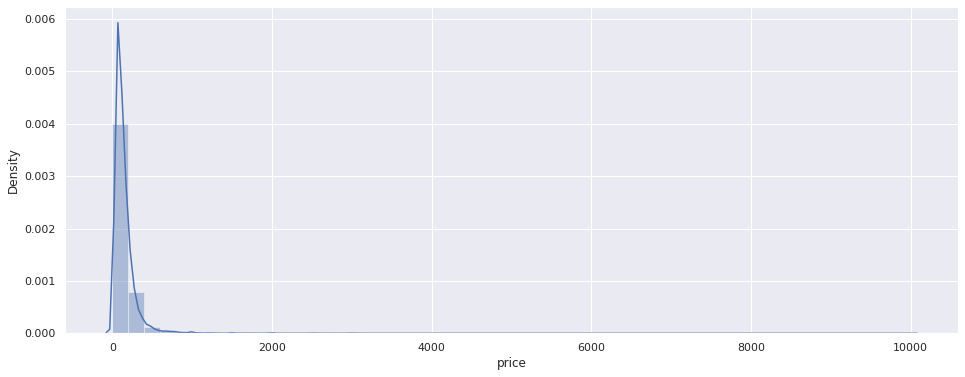

In [15]:
# Let's do the distribution plot first

sns.set(rc = {'figure.figsize' : (16,6)})
sns.distplot(df_airbnb_copy['price'], hist = True)

This distribution plot of 'price' tells us that it is postively-skewed and the distribution does not deviate much from the normal distribution. Let's see what it talks about skewness and kurtosis.

In [17]:
# Let's calculate skewness and kurtosis.

print('Skewness is : %0.2f' %df_airbnb_copy['price'].skew())
print('\n')
print('Kurtosis is : %0.2f' %df_airbnb_copy['price'].kurt())

Skewness is : 19.12


Kurtosis is : 585.67


The values of skewness and kurtosis have come out as very large. The distribution is highly skewed as the skewness is greater than 1. In this distribution, a huge amount of outliers are existing as the value of kurtosis is very large. We need to remove those outliers. In the very next sections we'll do the needful to remove those outliers.

# Handling outliers in the dataset ( Feature Engineering )

Well, when it comes to handle outliers then the famous dependent variable 'price' column will come into action from this dataset. Let's have a look at 'price' column to feel the presence of outliers. There is no need to get worried. I’ll be handling these outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


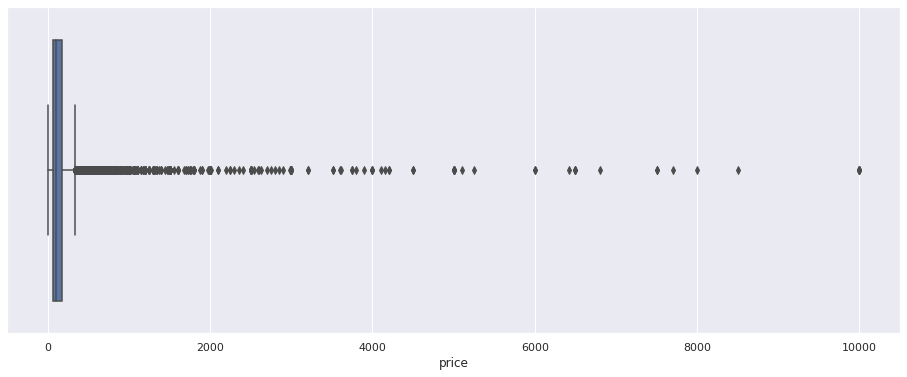

In [18]:
# Then, let's do the needful.

sns.boxplot(df_airbnb_copy['price'])

In [19]:
# Let's view the dataset from statistical direction.

df_airbnb_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We need to remove outliers as we can see that there are still outliers existing in the dataset. We'll approach with Quantile method first and then with IQR approach. Let's move ahead.

# Removing outliers
Quantile approach has been used first to remove outliers. As to this, we need to calculate minimum and maximum threshold.

In [20]:
# Quantile approach to remove ouliers
# Calculation of min and max threshold

minm_threshold, maxm_threshold = df_airbnb_copy.price.quantile([0.01,0.999])
print('Minimum threshold is : ', minm_threshold)
print('\n')
print('Maximum threshold is : ', maxm_threshold)


Minimum threshold is :  30.0


Maximum threshold is :  3000.0


In [21]:
# Now, let's calculate prices which are less than minimum threshold.

df_airbnb_copy[df_airbnb_copy.price < minm_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,2019-05-26,0.92,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,2014-10-20,0.07,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,NaN,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,2019-06-19,5.53,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,2019-06-06,1.22,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.00,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,NaN,NaN,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaN,NaN,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,NaN,6,338


In [22]:
# Similarly, let's calculate prices which are greater than maximum threshold.

df_airbnb_copy[df_airbnb_copy.price > maxm_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,NaN,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,NaN,NaN,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,NaN,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,NaN,NaN,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365


In [23]:
# Creating a new dataframe with prices having values greater than minimum threshold and less than maximum threshold.

df_airbnb_merge = df_airbnb_copy[(df_airbnb_copy.price > minm_threshold) & (df_airbnb_copy.price < maxm_threshold)]

df_airbnb_merge

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Now, let's make a distribution plot to see whether price distribution has been normalised or not.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


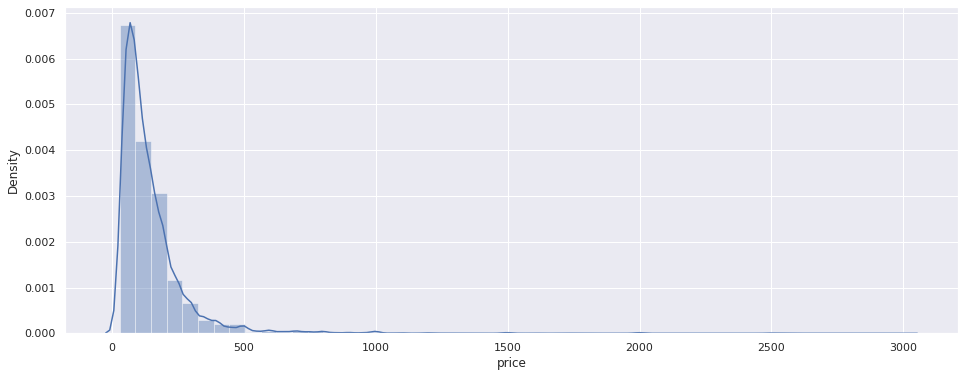

In [24]:
# Creating a distribution plot of 'price' column

sns.distplot(df_airbnb_merge['price'])

The distribution plot looks almost normalized. But, need to make more as few outliers are still existing. Then, let's do it.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


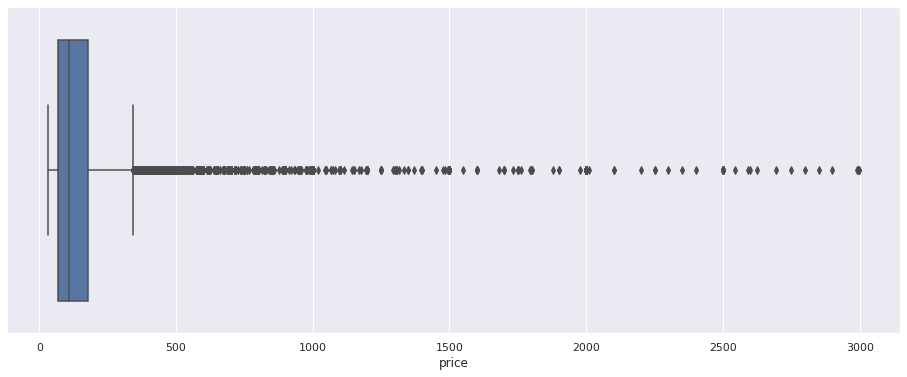

In [25]:
# Let's see the boxplot for the same dataframe to see outliers.

sns.boxplot(df_airbnb_merge['price'])

From the above boxplot, it can be easily observed that the outliers are not few but way more than few. Before going for IQR approach, we need to calculate skewness and kurtosis of the new dataset to reconfirm that many outliers are not existing.

In [26]:
# Calculation of skewness and kurtosis of new dataframe

print('Skewness is : %0.2f' %df_airbnb_merge['price'].skew())
print('\n')
print('Kurtosis is : %0.2f' %df_airbnb_merge['price'].kurt())

Skewness is : 6.38


Kurtosis is : 70.39


So, here it is ! Values of skewness and kurtosis have been reduced. That kurtosis value indicates that not many outliers are existing in the dataset. The remaining outliers will be removed hopefully by IQR approach as this approach has performed best in removing outliers.

In [28]:
# IQR approach to remove outliers
# Calculation of IQR ( Inter Quartile Range)

Q1 = df_airbnb_copy.quantile(0.25)
Q3 = df_airbnb_copy.quantile(0.75)
IQR = Q3 - Q1
print('Inter Quartile range is : \n', IQR)



Inter Quartile range is : 
 id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.830000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


Now, we need to create a user-defined function to remove outliers at ease. Let's do it then.

In [32]:
# Creating a user-defined function for the removal of outliers.

try:
  def outliers(datacol):
    ''' This function removes outliers. '''
    sorted(datacol) # sorting data columns
    Q1 , Q3 = np.percentile(datacol, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range , upper_range
except:
  print('The treatment of outliers')

In [33]:
# Calculation of lower and upper bound

lower_bound, upper_bound = outliers(df_airbnb_copy['price'])

In [36]:
# Printing lower bound and upper bound.

print('Lower bound is : ', lower_bound)
print('\n')
print('Upper bound is : ', upper_bound)

Lower bound is :  -90.0


Upper bound is :  334.0


In [39]:
# Let's check lower and upper range of outliers. That range should be lower than lower bound or higher than upper bound.

df_airbnb_copy[(df_airbnb_copy.price < lower_bound) | (df_airbnb_copy.price > upper_bound)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaN,NaN,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,NaN,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,NaN,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,NaN,1,9


In [42]:
# Now, making a dataframe with those rows having datapoints greater than lower bound and less than upper bound.

df_airbnb_merge1 = df_airbnb_copy[(df_airbnb_copy.price > lower_bound) & (df_airbnb_copy.price < upper_bound)]

df_airbnb_merge1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


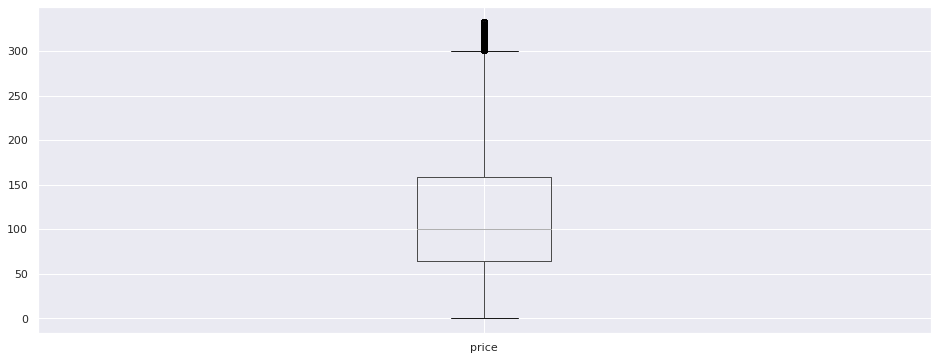

In [43]:
# Let's see the boxplot of 'price' column to confirm whether those outliers have been outcast or not.

df_airbnb_merge1.boxplot(column = 'price')

It's now wow! Those outliers have really been outcast of this dataset society. Let's see what skewness and kurtosis vouch for in terms of their values.

In [44]:
# Calculation of skewness and kurtosis

print('Skewness is : %0.2f' %df_airbnb_merge1['price'].skew())
print('\n')
print('Kurtosis is : %0.2f' %df_airbnb_merge1['price'].kurt())

Skewness is : 0.92


Kurtosis is : 0.17


Now, both skewness and kurtosis have been reduced. And the lower value of kurtosis signifies that outliers have really been outcast of the dataset society. 

Let's do the distribution plot to see whether the distribution of 'price' column has been normalized or not. Also, the normal distribution of 'price' column will reconfirm that outliers have indeed been outcast. Let's get back to business then.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


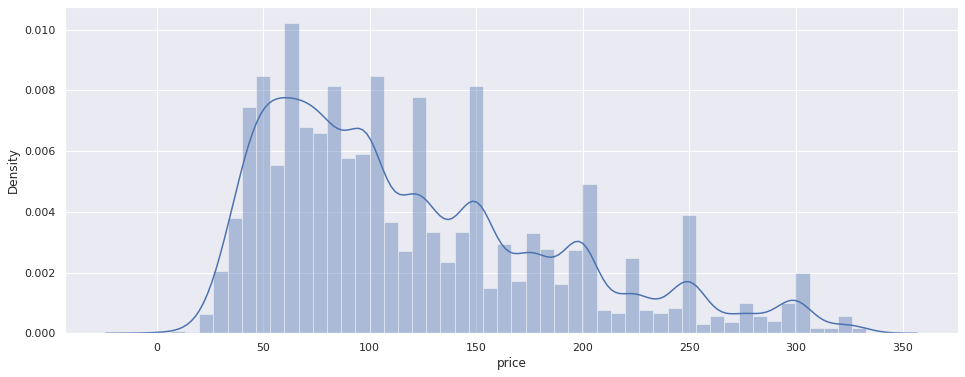

In [45]:
# Distribution plot of 'price' column

sns.distplot(df_airbnb_merge1['price'])

Indeed this distribution of 'price' column looks like a normal distribution.

# Removing redundant or unnecessary columns

In [ ]:
# We are dropping off columns that are insignificant and unethical as fas as our future data exploration and predictions are concerned.
# Also, we are dropping off 'host_name' column as this is relating to the names of actual human beings and also that presents no security threat.

df_airbnb_copy.drop(['id','name', 'host_name', 'last_review'], axis = 1, inplace = True)

In [ ]:
# Checking changes in the dataframe

print('The updated shape of the dataframe is : ', df_airbnb_copy.shape)
df_airbnb_copy.head()

The updated shape of the dataframe is :  (48895, 12)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Dealing with missing values

In [ ]:
# Replacing all NaN values with 0 in 'reviews_per_month'

df_airbnb_copy.fillna({'reviews_per_month' : 0 }, inplace = True)

In [ ]:
# Checking changes in the dataframe

df_airbnb_copy.reviews_per_month.isnull().sum()

0

# Checking the NaN values

In [ ]:
# Checking the null values in the dataset

df_airbnb_copy.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No null value has been found in the dataset and if it is found then need to remove rows and columns with null values.

# Removing the NaN values

In [ ]:
# Removing the NaN values from the dataset

df_airbnb_copy.dropna(how = 'any', inplace = True)

In [ ]:
# Getting a summary of the dataframe
df_airbnb_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

No null or NaN value has been found out in any column of the dataset.

# Checking zero values

In [ ]:
(df_airbnb_copy == 0).sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

# Observations:

* Four columns are avilable with zero values.
* 'price' column can be zero for some promotional offers of AirBNB.
* 'number_of_reviews' and 'reviews_per_month' can be zero if people did not provide reviews.
* And 'availability_365' column can be zero as some people provided reviews without staying in. Hence these values will be dropped off from the list.

# Dealing with invalid data

In [ ]:
# Checking the size of the dataframe

df_airbnb_copy.shape

(48895, 12)

In [ ]:
# Let's run a for loop to deal with invalid data
try:

  for col in range(len(df_airbnb_copy)):

    if df_airbnb_copy.availability_365[col] == 0 and df_airbnb_copy.number_of_reviews[col] != 0:

      df_airbnb_copy.drop([col], inplace = True)
except:
  print('Exception Handling')


Exception Handling


In [ ]:
# Rechecking the shape of the dataframe

df_airbnb_copy.shape

(36207, 12)


Now we can visualize that our dataset rows have been reduced to 36207 all the way from 48895

# E. **Exploration and Data Visualization**

In [ ]:
# By implementing describe() function to have several summary statistics excluding NaN values

df_airbnb_copy.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,161.832491,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.232662,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


At the outset, the summary statistics summarizes that
* the average price of listing is $161.83
* the average  minimum number of nights requierd to stay in a single visit is 7.95 nights
* the average total number of reviews provided by visitors is 27.59 reviews
* the average reviews per month is 1.30
* the average total number of listings registered under the name of the host is 9.15 listings
* the average number of days for which a host is available around a year is 152.30 days

But, there is definitely something wrong with this dataset as the minimum price is shown as $0 and maximum price as 10000 dollars. So, we need to look into this dataset and look out for outliers.

In [ ]:
# Checking all columns list in the dataset
df_airbnb_copy.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Let's move on to check out some interesting categorical unique values from the dataset.

In [ ]:
# Checking the unique values of 'neighbourhood_group' for number of neighbourhood groups

print('Total number of unique values in neighbourhood group is : ', len(df_airbnb_copy.neighbourhood_group.unique()))
df_airbnb_copy['neighbourhood_group'].unique()

Total number of unique values in neighbourhood group is :  5


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# Checking the unique values of 'neighbourhood' for number of neighbourhoods

print('Total number of unique values in neighbourhood is : ', len(df_airbnb_copy.neighbourhood.unique()))
df_airbnb_copy['neighbourhood'].unique()

Total number of unique values in neighbourhood is :  220


array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'Murray Hill',
       "Hell's Kitchen", 'Chinatown', 'Upper West Side', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'East Harlem', 'Park Slope', 'Bedford-Stuyvesant',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Flatlands',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Ridgewood', 'Morningside Heights', 'Jamaica',
       'Middle Village', 'NoHo', 'Ditmars Steinway', 'Cobble Hill',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point',
       'Eastchester', '

In [ ]:
# Checking the unique values of room_type column for number room types available for rental

print('The total number of unique values in room_type is :  ', len(df_airbnb_copy.room_type.unique()))
df_airbnb_copy['room_type'].unique()

The total number of unique values in room_type is :   3


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Number of unique host ids for Airbnb hosts

print('The number of host ids for Airbnb hosts is : ')
df_airbnb_copy.host_id.nunique()

The number of host ids for Airbnb hosts is : 


26388

At the outset, the dataset have 16 columns and 48895 rows. But, a significant number of values seem to be missing from 'last_review' and 'reviews_per_month' columns. It has information regarding the listings, e.g., 'id', 'host_name', 'room_type', 'price', 'neighbourhood'.

The ins and outs have been provided below after cleaning the dataset.

* 26388 unique host ids
* 12 columns
* Three types of room available for rental
* 36207 listings
* 220 unique neighbourhoods
* Five different types of neighbourhood group

# Q1. What can we learn about different hosts and areas?

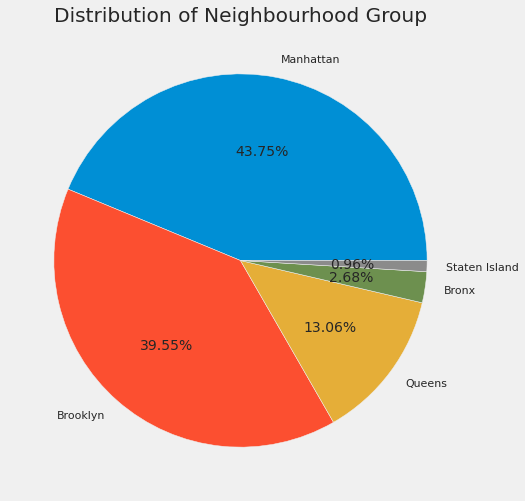

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8))
plt.title('Distribution of Neighbourhood Group')
neighbourhood_group_count = df_airbnb_copy.neighbourhood_group.value_counts()
neighbourhood_group_label = df_airbnb_copy.neighbourhood_group.value_counts().index
pie_chart = plt.pie(neighbourhood_group_count, labels = neighbourhood_group_label, autopct = '%1.2f%%', startangle = 0)
plt.show()

# Observations  :

* The above pie chart depicts that Airbnb listings in New York city near Manhattan and Brooklyn have the highest share of hotels. 
* Manhattan has the highest number of listings with 43.75% of the total listings, followed by Brooklyn with 39.55%. The rest three groups have significantly less listings as compared to those two previous listings.
* The rest three are Queens with 13.06%, Bronx with 2.68% and Staten Island with 0.96%. 

Now we can see which neighbourhood group has the highest number of listings in terms of bar graph.

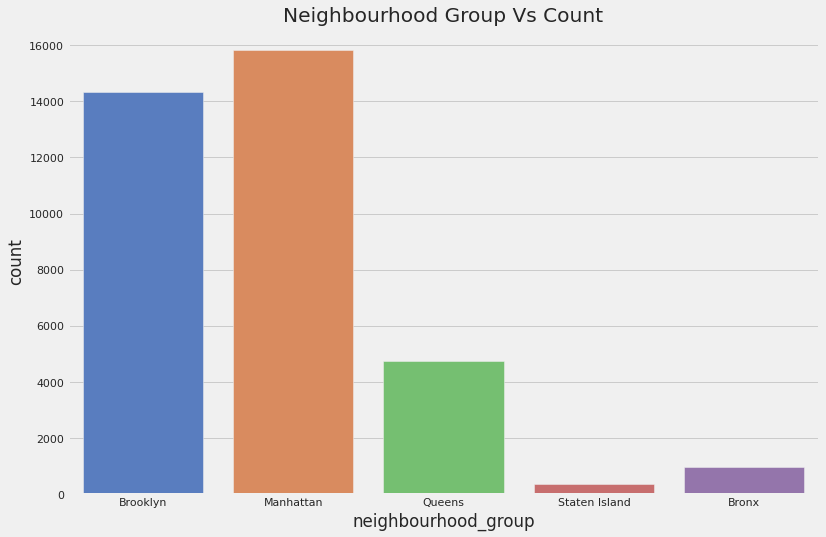

In [ ]:
# Let's plot bar graph of neighbourhood group vs count

plt.figure(figsize = (12,8))
plt.title('Neighbourhood Group Vs Count')
sns.countplot(x = df_airbnb_copy.neighbourhood_group, palette = 'muted')
plt.show()


#  Observations :

* From the above bar graph, it can be visualized that Manhattan has the highest number of listings followed by Brooklyn, Queens, Bronx and Staten Island amongst neighbourhood group.
* The same observation is replicating in terms of piechart as we have seen in the previous piechart.

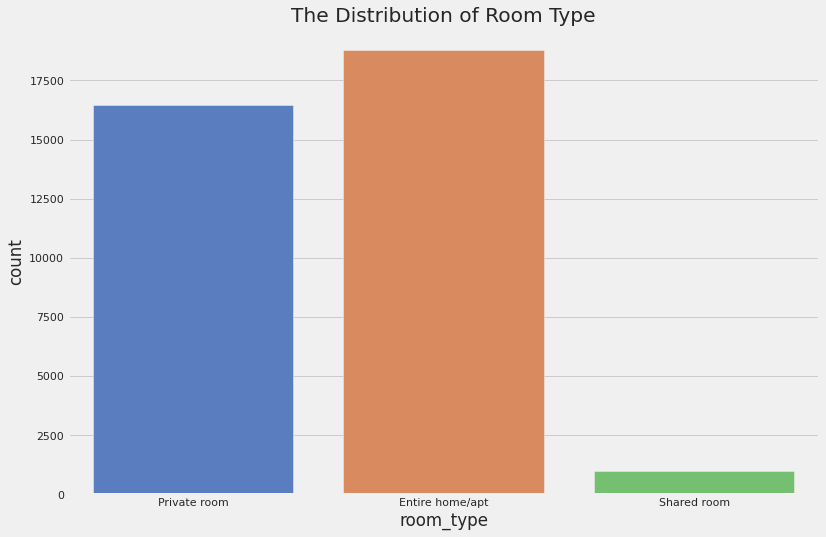

In [ ]:
# Let's visualize the distrbution of room type

plt.figure(figsize = (12, 8))
plt.title('The Distribution of Room Type')
sns.countplot(x = df_airbnb_copy.room_type, palette = 'muted')
plt.show()


# Observations :  
 * From this bar plot it can be said that 'Entire home/apt' has the highest number of listings followed by 'Private room'.
 * 'Shared room' has the lowest listings among room type.

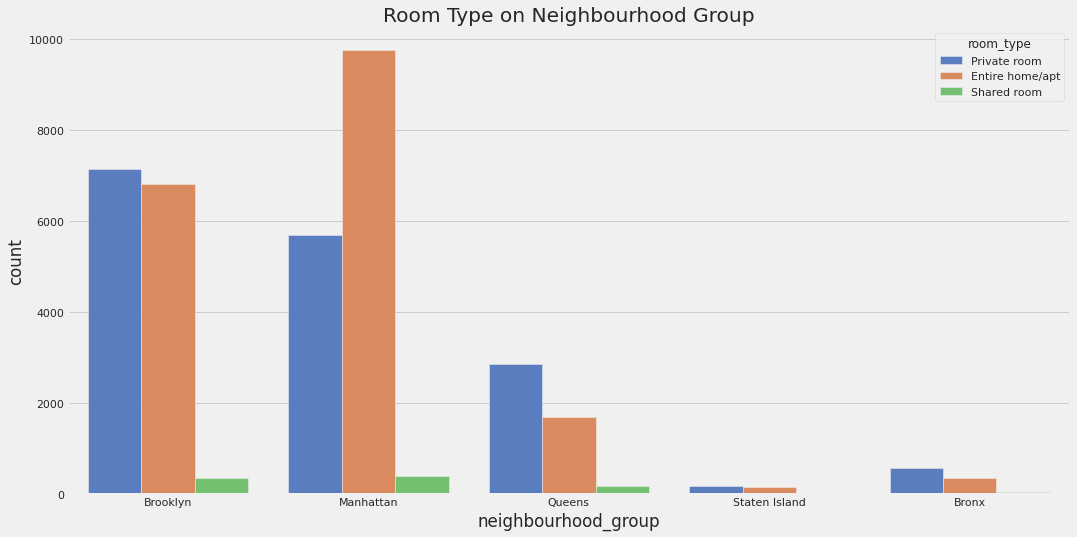

In [ ]:
# Let's plot room type on neighbourhood group

plt.figure(figsize = (16,8))
plt.title('Room Type on Neighbourhood Group')
sns.countplot(x = df_airbnb_copy.neighbourhood_group, hue = df_airbnb_copy.room_type, palette = 'muted')
plt.show()


# Observations :       

* The above graphs shows that 'Entire home/apt' is listed the most in case of Manhattan whereas 'Private room' and 'Entire home/apt' share almost the same number in Brooklyn.
* The number of private rooms of Airbnb in Brooklyn are way more than Manhattan, Queens, Bronx and Staten Island.
* The total number of shared rooms is very less in comparison with other two ('Private room' and 'Entire home/apt' ) types of room type among neighbourhood groups.

# Let's have a look what can be done with latitude and longitude.

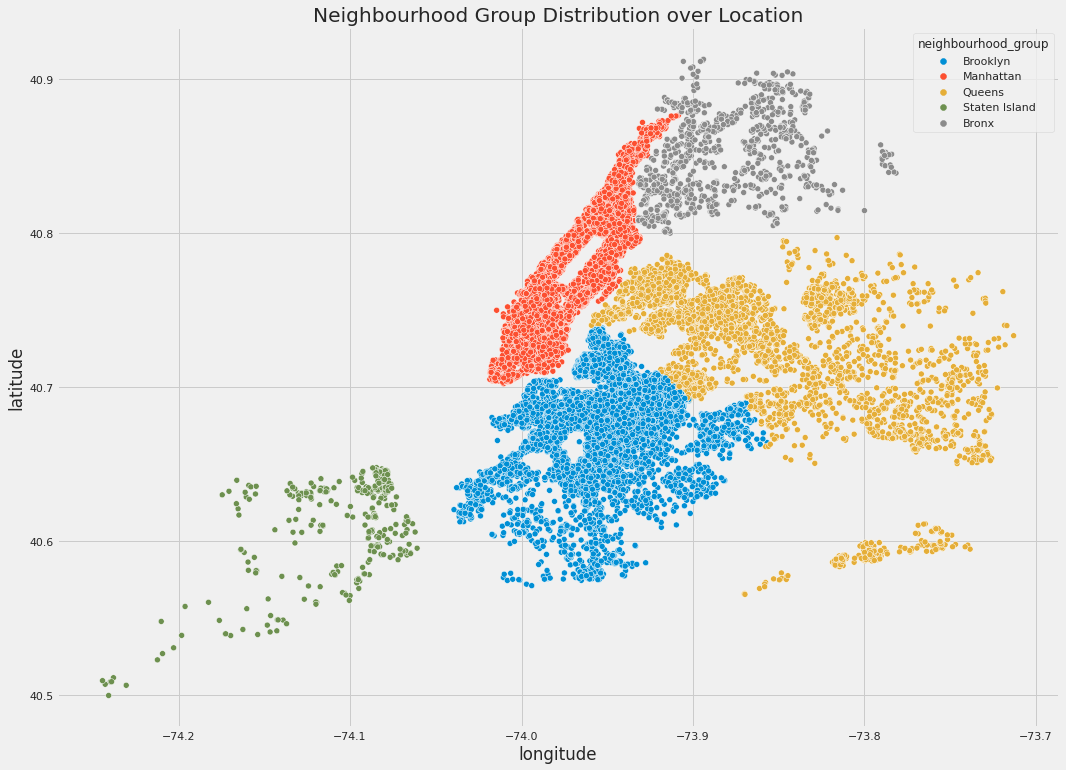

In [ ]:
# Let's visualize neighborhood group distribution over location of New York city through scatter plot

plt.figure(figsize= (16, 12))
plt.title('Neighbourhood Group Distribution over Location')
sns.scatterplot(x= df_airbnb_copy.longitude, y = df_airbnb_copy.latitude, hue = df_airbnb_copy.neighbourhood_group)
plt.show()

# Observations:

* Neighbourhood group distribution is scattered mostly in three neighbourhood regions : Brooklyn, Manhattan and Queens.
* And least scattered is in Bronx and Staten Island.

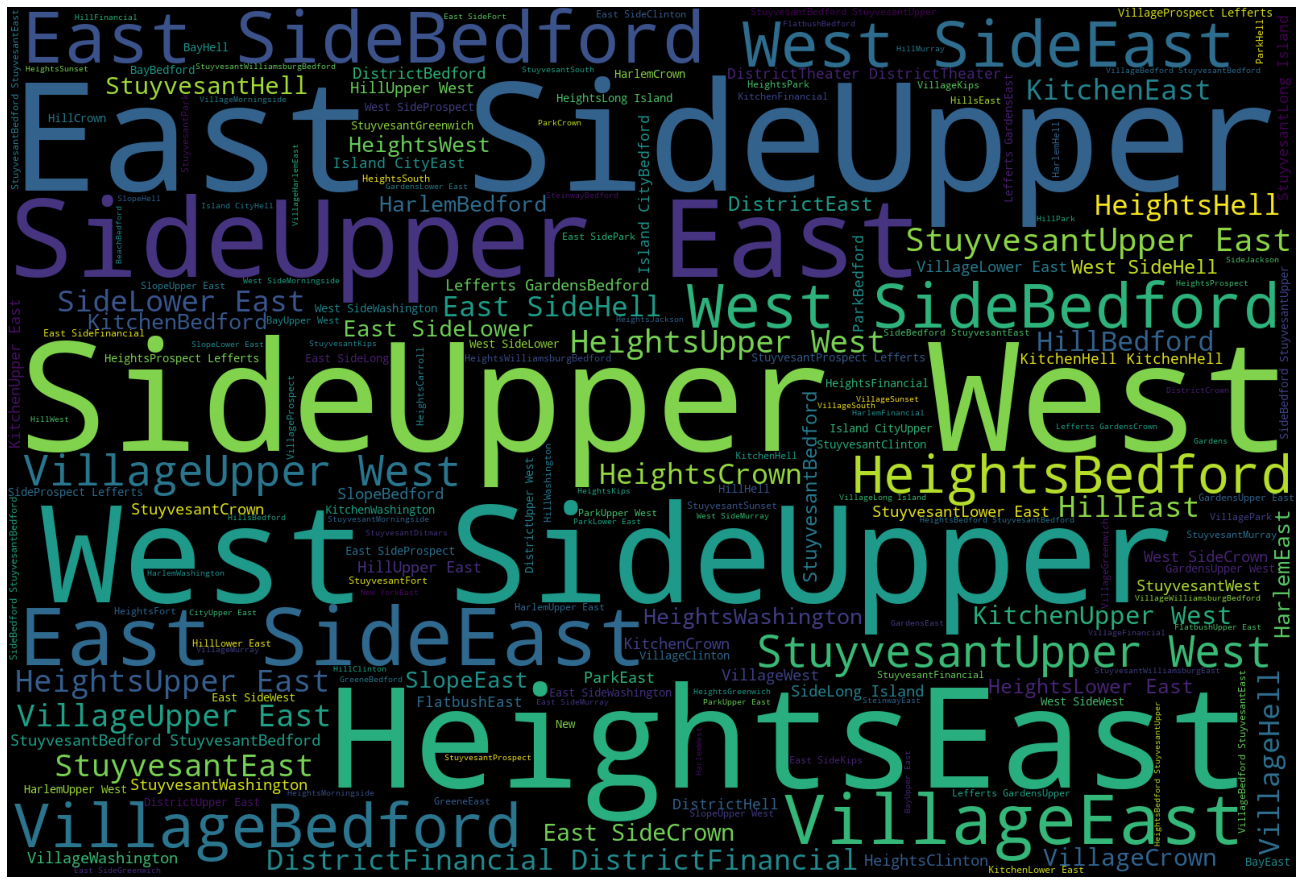

In [ ]:
# Word Cloud

from wordcloud import WordCloud
plt.subplots(figsize = (25, 16))
wordcloud = WordCloud(background_color = 'black', width = 1600, height = 1080).generate(''.join(df_airbnb_copy.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()


# Q2. Which hosts are the busiest and why ?

In [ ]:
# Let's have a look which hosts (IDs) have the most number of listings in Airbnb dataset platform

top_host = df_airbnb_copy.host_id.value_counts().head(8)
top_host

219517861    327
107434423    232
30283594     121
137358866     98
12243051      96
16098958      95
61391963      87
22541573      85
Name: host_id, dtype: int64

In [ ]:
# Creating another dataframe of top host ids 

top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns = {'index': 'host_id', 'host_id': 'Per_Count'}, inplace = True)
top_host_df

,host_id,Per_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,98
4,12243051,96
5,16098958,95
6,61391963,87
7,22541573,85


In [ ]:
# From our dataset, we can have our findings by existing column named 'calculated_host_listings_count'
# We can check the maximum value of that column

top_host_check_val = df_airbnb_copy.calculated_host_listings_count.max()
top_host_check_val

327

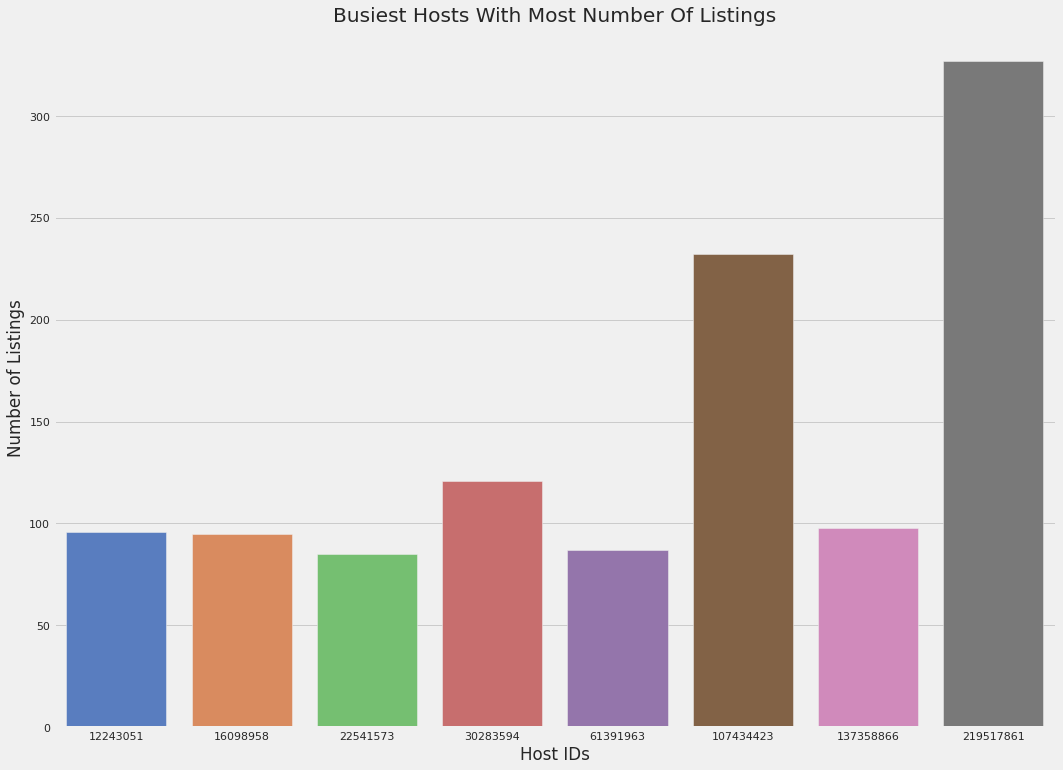

In [ ]:
# Plotting a barplot on busiest hosts with the number of listings

plt.figure(figsize = (16,12))
vis = sns.barplot(x = 'host_id', y = 'Per_Count', data = top_host_df, palette = 'muted')
vis.set_title('Busiest Hosts With Most Number Of Listings')
vis.set_xlabel('Host IDs')
vis.set_ylabel('Number of Listings')
plt.show()

In [ ]:
# Now taking the intersection of two dataframes 'top_host_df' and 'df_airbnb_copy'

df_int = pd.merge( top_host_df, df_airbnb_copy, how = 'inner', on = ['host_id'])
df_int.head()

,host_id,Per_Count,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,219517861,327,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
1,219517861,327,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
2,219517861,327,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
3,219517861,327,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
4,219517861,327,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81


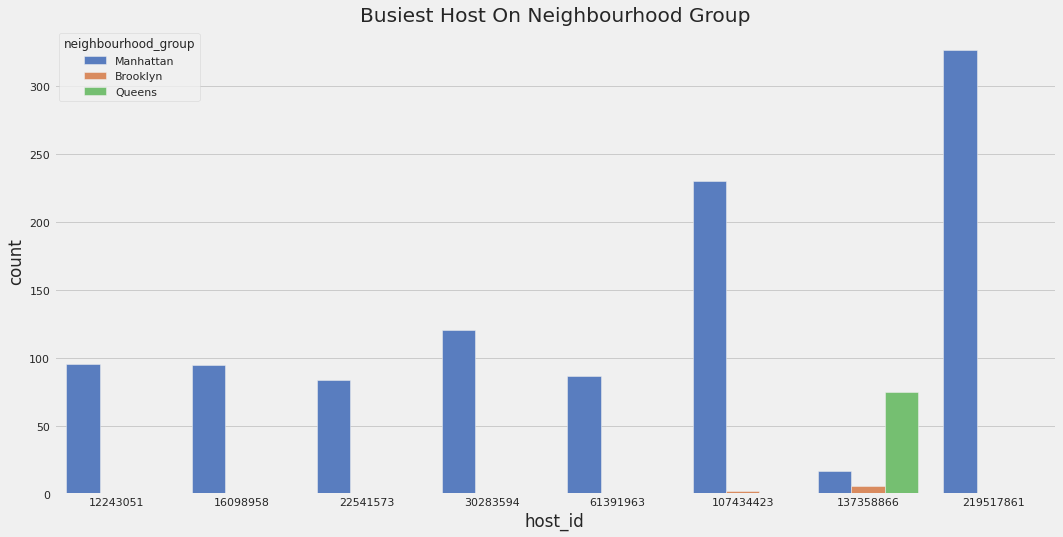

In [ ]:
# Let's plot busiest host on neighbourhood group

plt.figure(figsize = (16,8))
plt.title('Busiest Host On Neighbourhood Group')
sns.countplot(x = df_int.host_id, hue = df_int.neighbourhood_group, palette = 'muted')
plt.show()

# Observations :    

* From the above graph, it can be observed that Manhattan group is having the most number of listings.
* And all busiest hosts belong to Manhattan group.

# Q3.  Find out the top 10 hosts with most number of listings in Airbnb NYC dataset.

# Univariate Analysis on Airbnb:
To answer this question we'll introduce univariate analysis which is based on working with single variable. We will be analysing the most number of listings in New York city. Let's do it.


In [ ]:
# First of all we'll have a look at top 5 listings in Airbnb NYC dataset
df_airbnb_copy1 = df_airbnb.copy() # making a copy of the original dataframe as 'name' column has been dropped in previous analysis

listings_5_df = df_airbnb_copy1['name'].value_counts()[:5].reset_index()
listings_5_df.rename(columns = {'index': 'Listings on Airbnb', 'name': 'Total_no_listings'}, inplace = True)
listings_5_df



,Listings on Airbnb,Total_no_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11


As we can see that 'Hillside Hotel' is found to have the most number of listings as far as the NYC dataset is concerned and is followed by 'Home away from home'.

In [ ]:
# Now, let's count top 10 hosts with most number of listings in NYC dataset

top_10_hosts = df_airbnb_copy1['host_name'].value_counts()[:10]
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

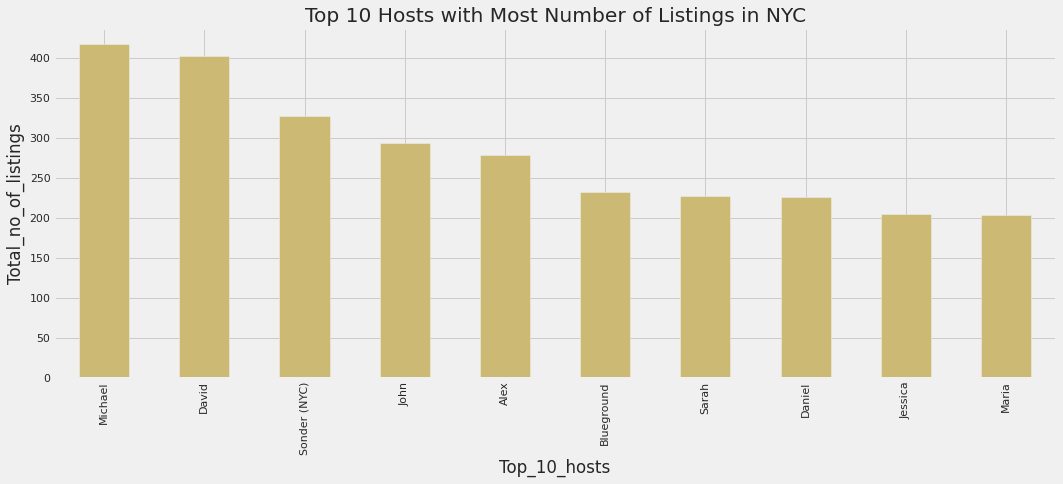

In [ ]:
# Let's plot bar graph to have a better visualization of the dataset

top_10_hosts.plot(kind = 'bar' , color = 'y')
plt.xlabel('Top_10_hosts')
plt.ylabel('Total_no_of_listings')
plt.title('Top 10 Hosts with Most Number of Listings in NYC')
plt.show()


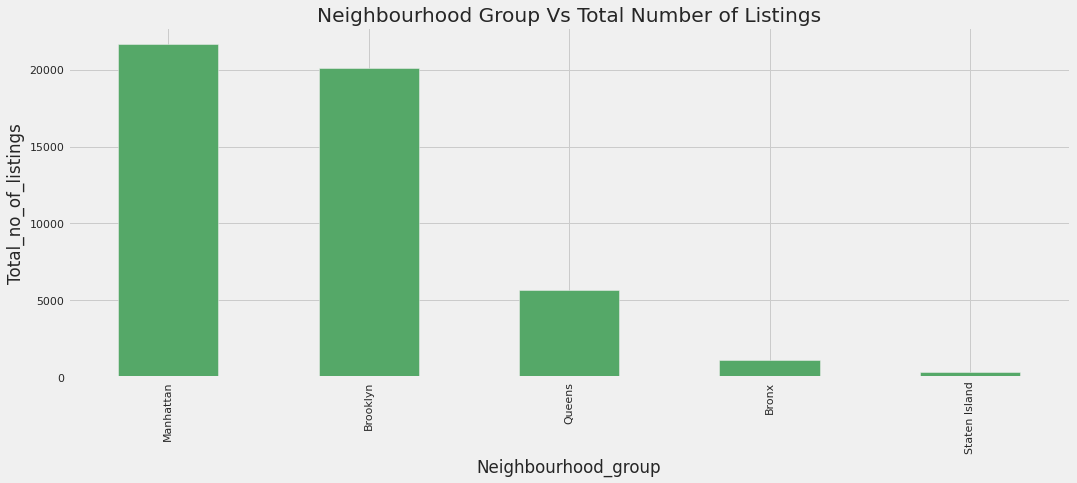

In [ ]:
# Let's plot the bar graph to visualize which neighbourhood group has the highest number of listings in New York city.

df_airbnb_copy1['neighbourhood_group'].value_counts().plot(kind = 'bar', color = 'g')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Total_no_of_listings')
plt.title('Neighbourhood Group Vs Total Number of Listings')
plt.show()

# Observations:
* Manhattan has the highest number of listings amongst neighbourhood group followed by Brooklyn.
* Staten Island has the least number of listings.

In [ ]:
# Let's check number of unique neighbourhood in the dataset
print('Total number of unique neighbourhood is : ', len(df_airbnb_copy1.neighbourhood.unique()))

df_airbnb_copy1['neighbourhood'].unique()

Total number of unique neighbourhood is :  221


array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

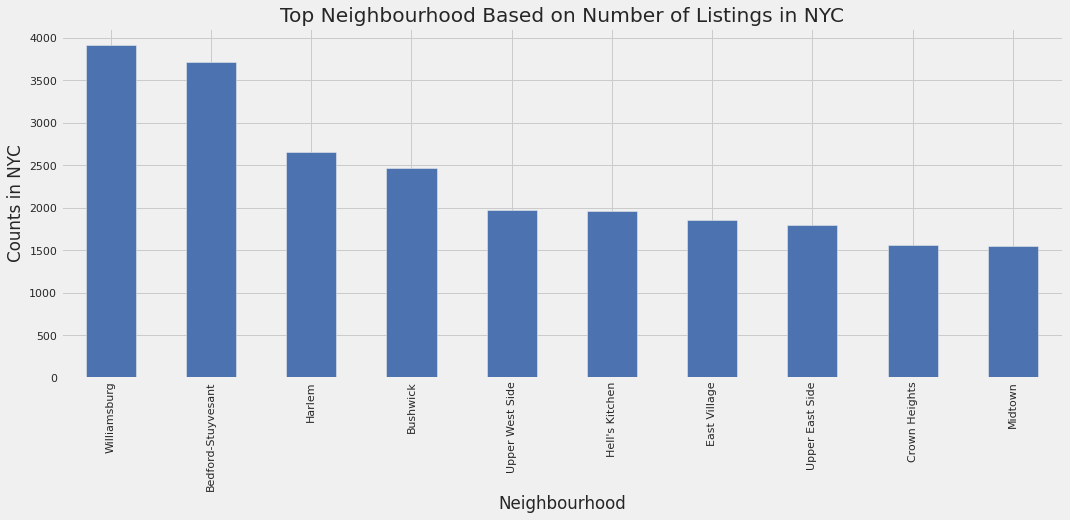

In [ ]:
# Checking top 10 neighbourhood based on number of listings in entire New York city

top_10_neighbourhood = df_airbnb_copy1['neighbourhood'].value_counts()[:10]
top_10_neighbourhood.plot(kind = 'bar', color = 'b')
plt.xlabel('Neighbourhood')
plt.ylabel('Counts in NYC')
plt.title('Top Neighbourhood Based on Number of Listings in NYC')
plt.show()




# Observations:

* We can see that 'Williamsburg' and 'Bedford-Stuyvesant' are on the same label and have the highest listing followed by Harlem.
* On the other side, 'Upper West Side','Hell's Kitchen', 'East Village' and 'Upper East Side' share almost the same label in terms of listings.
* And same is applicable to 'Crown Heights' and Midtown'.

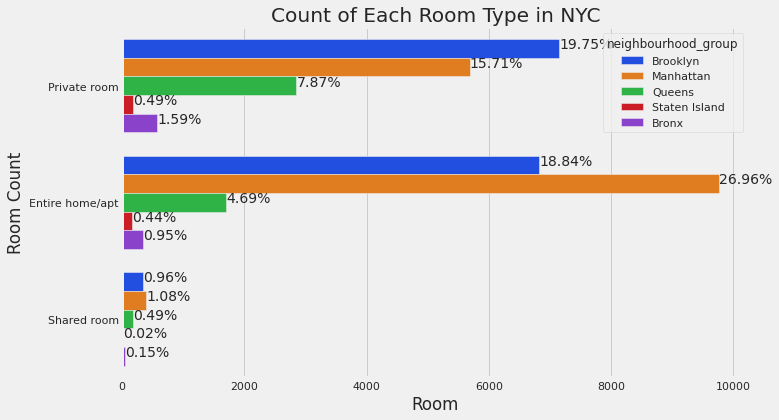

In [ ]:
# Let's count each room type in the entire NYC

try:
  plt.rcParams['figure.figsize'] = (10, 6)
  axi = sns.countplot(y = 'room_type', hue = 'neighbourhood_group', data = df_airbnb_copy, palette = 'bright')
  Tot = len(df_airbnb_copy['room_type'])
  for i in axi.patches:
    percentage = '{:.2f}%'.format(100 * i.get_width()/ Tot)
    x = i.get_x() + i.get_width() + 0.02
    y = i.get_y() + i.get_height()/2
    axi.annotate(percentage, (x,y))
  plt.title('Count of Each Room Type in NYC')
  plt.xlabel('Room')
  plt.ylabel('Room Count')
  plt.show()
except:
  print('Exception handling is done.')



# Observations:

* From this observation, it can be said that Manhattan has more listed properties in "Entire home/apt" room type section and that is around 27% of the total listed properties followed by Brooklyn with 18.84% and Queens with 4.69%.
* Now in case of 'Private room' section, Brooklyn has more listed properties with 19.75% followed by Manhattan with 15.71% and Queens with 7.87%.
* Another interesting part is that room type 'Shared room' is negligible as each and every neighbourhood group in this section has very less percentage of the total listed properities and the shares of Bronx and Staten Island have very less percentage in each and every neighbourhood group and that is simply negligible.


# Q4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

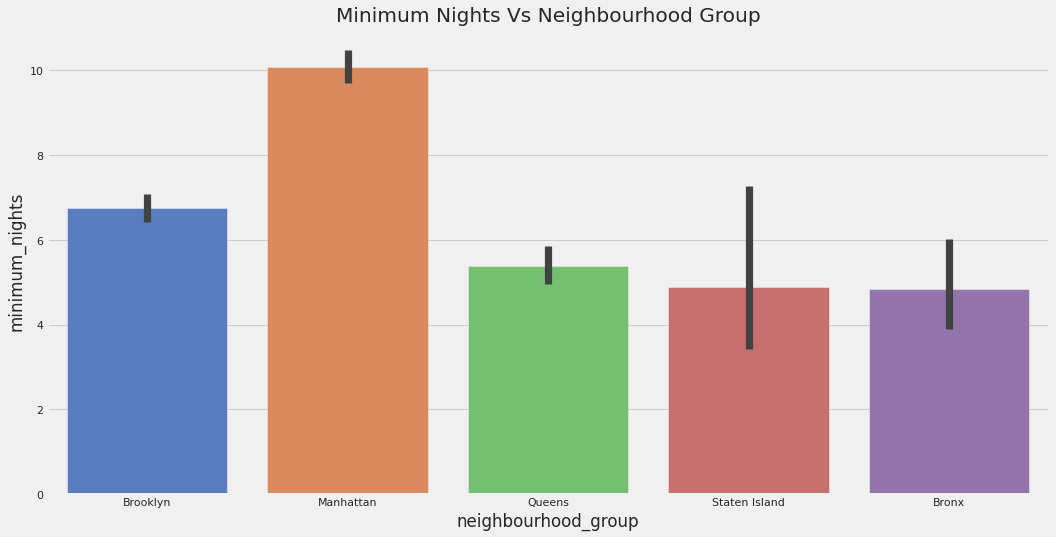

In [ ]:
# To find the answer of the above question, let's plot Minimum Nights Vs Neighbourhood Group

plt.figure(figsize = (16,8))
plt.title('Minimum Nights Vs Neighbourhood Group')
sns.barplot(x = df_airbnb_copy.neighbourhood_group, y = df_airbnb_copy.minimum_nights, palette = 'muted')
plt.show()

# Observations:  
* From the above graph, it can be observed that Manhattan has the highest number of minimum nights followed by Brooklyn, Queens, Staten Island and Bronx.
* Another interesting part is that Staten Island and Bronx share almost the same number of minimum nights.

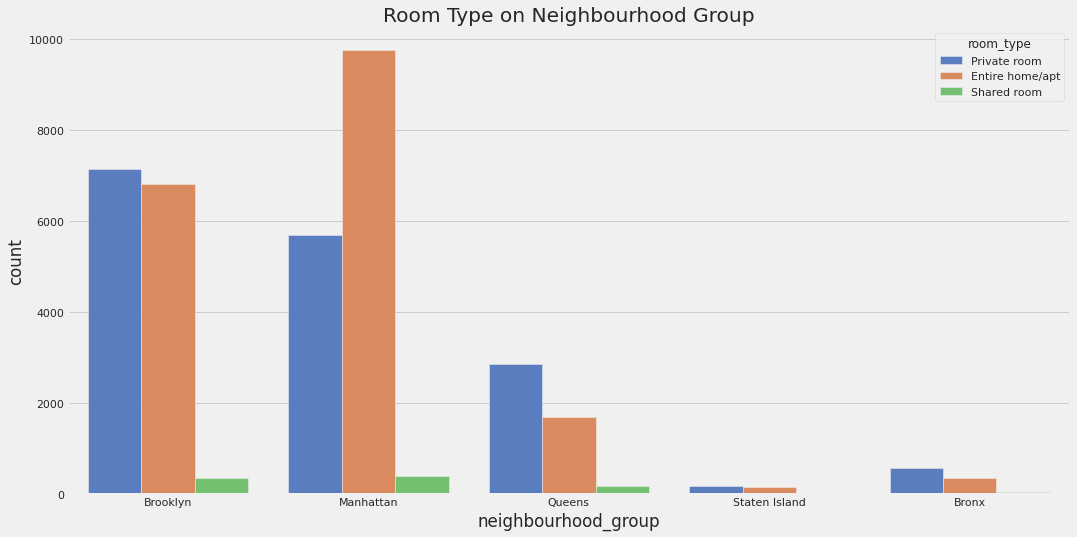

In [ ]:
# Let's see how room type looks like on neighbourhood group
plt.figure(figsize = (16,8))
plt.title('Room Type on Neighbourhood Group')
sns.countplot(x = df_airbnb_copy.neighbourhood_group, hue = df_airbnb_copy.room_type, palette = 'muted')
plt.show()

# Observations :       

* The above graph shows that 'Entire home/apt' is listed the most in case of Manhattan whereas 'Private room' and 'Entire home/apt' share almost the same number in Brooklyn.
* The number of private rooms of Airbnb in Brooklyn are way more than Manhattan, Queens, Bronx and Staten Island.
* The total number of shared rooms is very less in comparison with other two types of room type among neighbourhood groups.

# Bi-variate analysis on Airbnb:

Let's now check for distribution of price across: Manhattan, Brooklyn, Queens,  Staten Island and Bronx ( working with more than one variable ).

Instead of checking distributions for each categories one by one let me implement violin plot for getting the overall statistics for each group. But, eventually we will get to know the median price vs neighbourhood group.

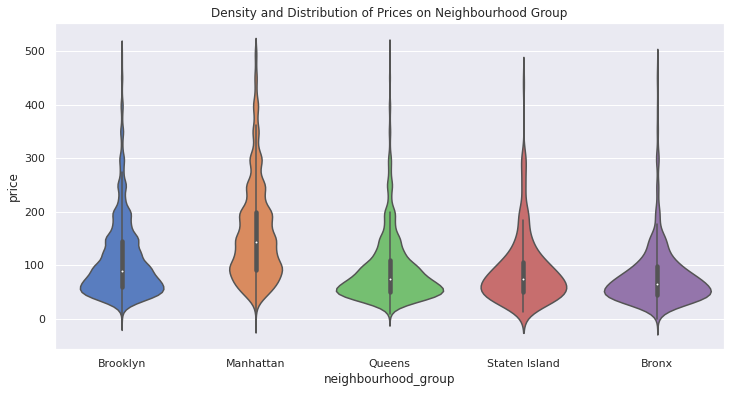

In [49]:
# It has benn observed that statistical table shows some extreme values by using describe() function. 
# We need to remove those extreme values for better data visualization.
# It can be accomplished by creating a sub-dataframe with removed extreme values which are less than 500

plt.figure(figsize = (12,6))
plt.title('Density and Distribution of Prices on Neighbourhood Group')
sub_df = df_airbnb_copy[df_airbnb_copy.price < 500]
# Implementing violinplot to show density and distribution of prices on neighbourhood group
vis_sub = sns.violinplot(data = sub_df, x = 'neighbourhood_group', y = 'price', palette = 'muted')
plt.show()

# Observations:

* From this violin plot, we can come across few things regarding the density and distribution of prices of Airbnb dataset in New York city.
* It can be said that Manhattan has the highest range of prices for listings with almost 150 USD being the median price, followed by Brooklyn with almost $90 per night.
* Queens and Staten Island seem to have similar  price distributions whereas Bronx is the cheapest amongst all.

The density and distribution of prices comes as no surprise and it is an open secret that Manhattan is one of most expensive places in the world for food and lodging whereas Bronx seems to have the lower standard of living.

Manhattan has the highest number of listings due to following reasons.
* It has the highest 'minimum_nights' count.
* It has the highest booking of room type 'Entire Home / Apartment'.
* And it has higher range of prices in comparison with others.

Therefore, people who want to prolong their vacations would to love to book 'Entire home/apt' and can avail affordable prices with higher standard of living due to higher range.

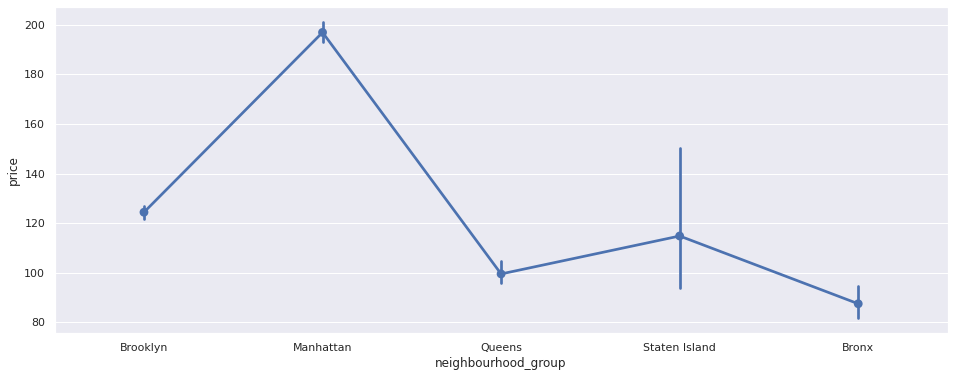

In [50]:
# Let's calculate average price for each neighbourhood group by applying pointplot.

sns.pointplot( x = 'neighbourhood_group', y = 'price', data = df_airbnb_copy)

# Observations:

* It is evident from the above pointplot that Manhattan has got the highest average price amongst neighbourhood group in New York city. So, it is the most expensive neighbourhood group in NYC with an average price of almost $200 per day followed by Brooklyn with an average price little bit higher than USD 120 per day.

* Staten Island stands with little less than $120 per day average price and Queens stands with exactly USD 100 average price per day.

* There is uniqueness in case of Bronx. It is the cheapest place in NYC to live in with average price of almost $90 per day. That is not absurd rather being normal. 

# Q5.Find out Total Count of Each Room Type as per Listing

In [ ]:
# Finding unique values of column room_type

df_airbnb_copy_room_type = df_airbnb_copy.room_type.unique()

In [ ]:
df_airbnb_copy_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Finding out the most listed room type

df_airbnb_copy_most_listed = dict(df_airbnb_copy.room_type.value_counts())

In [ ]:
df_airbnb_copy_most_listed

{'Entire home/apt': 18786, 'Private room': 16442, 'Shared room': 979}

In [ ]:
# Creating dataset for total count of each room type

dataset = list(df_airbnb_copy_most_listed.values())

In [ ]:
dataset

[18786, 16442, 979]

In [ ]:
room_type = list(df_airbnb_copy_most_listed.keys())

In [ ]:
room_type

['Entire home/apt', 'Private room', 'Shared room']

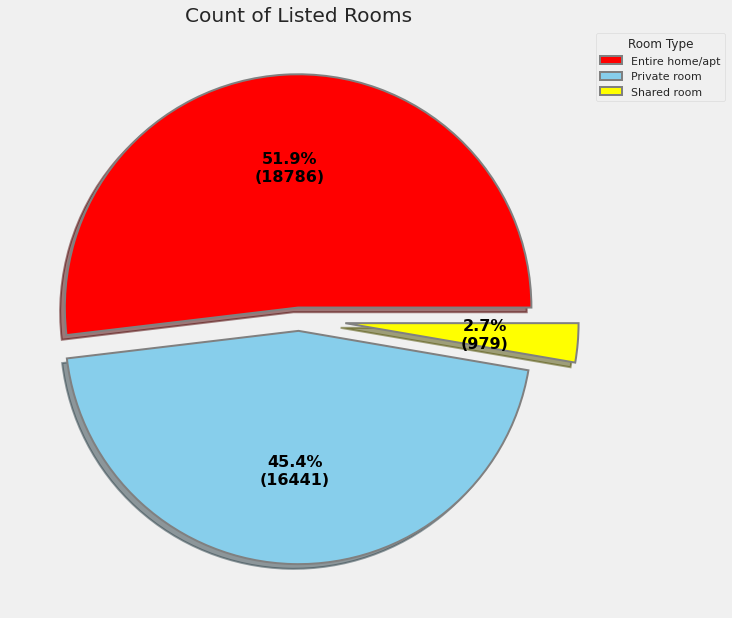

In [ ]:
# Creating a pie chart to view count of listed rooms
try:

  
  # Generating colour parameters

  colors = ('red', 'skyblue', 'yellow')

  # Creating explode data

  explode = (0.05,0.05, 0.2)

  # properities of wedge

  wp = {'linewidth' : 2, 'edgecolor' : 'grey' }

  # create autocpt arguments by creating a custom function

  def fun(pct, allvalues):
    ''' This function creates autocpt arguments. '''
    abs = int(pct / 100 *np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, abs)

  # Creating pie chart and plot

  fig, airbnb_pie_chart = plt.subplots(figsize = (12, 10))
  wedges, texts, autotexts = airbnb_pie_chart.pie(dataset, autopct = lambda pct: fun(pct, dataset), 
                                                  explode = explode, 
                                                  shadow = True, 
                                                  colors = colors, 
                                                  startangle = 0,
                                                  wedgeprops = wp, textprops = dict(color = 'black'))



  # Adding legend
  airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",          
                        bbox_to_anchor=(1, 0., 7.,1))

  plt.setp(autotexts, size = 16, weight = "bold")
  airbnb_pie_chart.set_title("Count of Listed Rooms")
  plt.show()
except:
  print('Mission Accomplished')
  

# Observations :



* It is evident from the above pie chart analysis that 'Entire home/apt' has the highest percentage with almost 52% listings of the total count of room type.
* 'Private room' has almost 45% of listings. 
* 'Shared room' has the lowest percentage with almost 3%.




# Q6. What is the average preferred price by the customers in accordance with locations ?

In [ ]:
# Brief description regarding numerical columns in the dataset

df_airbnb_copy.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,161.832491,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.232662,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Visualizing first 3 rows of the dataset
df_airbnb_copy.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [ ]:
# Average preferred price of property in accordance with locations

df_avg_preferred_price = df_airbnb_copy.groupby(['neighbourhood_group', 'room_type'], as_index = False)['price'].mean().rename(columns = {'neighbourhood_group' : 'Location', 'price' : 'Average Price'})

In [ ]:
df_avg_preferred_price

,Location,room_type,Average Price
0,Bronx,Entire home/apt,129.049563
1,Bronx,Private room,68.210801
2,Bronx,Shared room,61.296296
3,Brooklyn,Entire home/apt,187.188242
4,Brooklyn,Private room,80.691275
5,Brooklyn,Shared room,50.913793
6,Manhattan,Entire home/apt,269.734405
7,Manhattan,Private room,126.575598
8,Manhattan,Shared room,89.721228
9,Queens,Entire home/apt,153.592462


In [ ]:
# Unstack the groupby information to plot the graph

df_avg_preferred_price_unstack = df_airbnb_copy.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

In [ ]:
df_avg_preferred_price_unstack

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,129.049563,68.210801,61.296296
Brooklyn,187.188242,80.691275,50.913793
Manhattan,269.734405,126.575598,89.721228
Queens,153.592462,69.829533,71.084270
Staten Island,176.627329,63.152542,62.125000


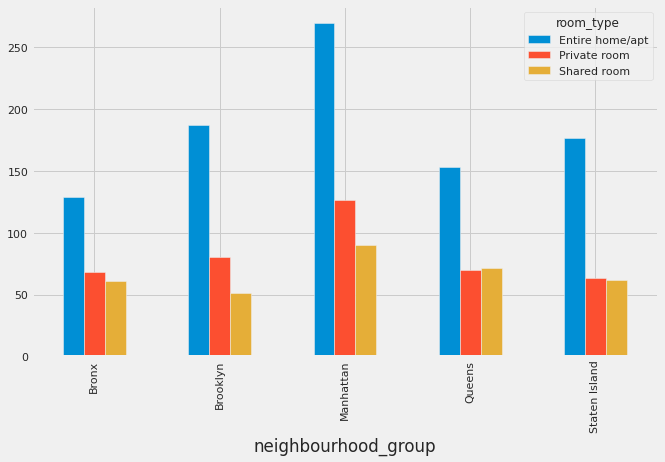

In [ ]:
# Detect the graph of average price of property in terms of locations

df_avg_preferred_price_unstack.plot.bar()

# Observations :
 * From the above analysis in the bar graph, we can say that Manhattan has the highest average price in terms of 'Entire home/apt' whereas average price of 'Shared room' is the lowest in case of Brooklyn.
 * On the other hand, Bronx, Queens and Staten Island have alomst the same price for both 'Private room' and 'Shared room' and the price is alomst $50.

# Q7.Where the customers pay the maximum and minimum rent ( in terms of locations ) ?

In [ ]:
# Find out maximum rent with respect to locations by creating a new dataframe

df_max_price = df_airbnb_copy.groupby('neighbourhood_group', as_index = False)['price'].max().sort_values(['price'], ascending = False).rename(columns = {'price': "Maximum Price", 'neighbourhood_group': 'Location'})

df_max_price

,Location,Maximum Price
2,Manhattan,10000
1,Brooklyn,8000
4,Staten Island,5000
3,Queens,2600
0,Bronx,2500


In [ ]:
# Find out minimum rent with respect to loactions by creating a new dataframe

df_min_price = df_airbnb_copy.groupby('neighbourhood_group', as_index = False)['price'].min().sort_values(['price'], ascending = True).rename(columns= {'price' : 'Minimum Price', 'neighbourhood_group': 'Location'})

df_min_price

,Location,Minimum Price
0,Bronx,0
1,Brooklyn,0
2,Manhattan,0
3,Queens,10
4,Staten Island,13


In [ ]:
# Brief description regarding numerical columns in the dataset

df_airbnb_copy.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,161.832491,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.232662,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Observations :

* From the above dataframe, we can say that there are some values as $0 in case of minimum price. But, on the other hand, AirBNB does not provide free accommodation to its customers in any hotel. To fix this problem, we need to create a user-defined function in which the minimum price is based on the minimum night spent.

* There are also some other entries in the dataset in which minimum night is 1 and the respective price is $0.

* This is not feasible in this scenario. So, we need to replace those price values which are less than $100 with mean value.

In [ ]:
# Observe where minimum nights is 1 and price is minimum

df_airbnb_copy[df_airbnb_copy['minimum_nights'] == 1].sort_values(['price', 'minimum_nights'], ascending = [True, True])

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25794,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
21700,33511962,Manhattan,Harlem,40.81302,-73.95349,Shared room,10,1,0,0.00,1,0
22835,97001292,Queens,Jamaica,40.69085,-73.79916,Entire home/apt,10,1,43,1.68,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,3750764,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,0.00,6,364
42523,7407743,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364
45666,262534951,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,6.15,2,179
29662,156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146


In [ ]:
# Get the number of values whose price is less than $100

df_airbnb_copy.loc[df_airbnb_copy['price'] < 100, 'price'].count()

15763

In [ ]:
# Find out the mean value of price which is less than $100

round(df_airbnb_copy.loc[df_airbnb_copy['price'] < 100, 'price'].mean())

65

In [ ]:
# Modify the value price where minimum night = 1 and price of their properties are less than $50

df_airbnb_copy['price'] = np.where((df_airbnb_copy['price'] <= 50) & (df_airbnb_copy['minimum_nights'] == 1), 
                                   round(df_airbnb_copy.loc[df_airbnb_copy['price'] < 100, 'price'].mean()),
                                   df_airbnb_copy['price'])

Let us see how many rows we have with price $0 in the dataset.

In [ ]:
df_airbnb_copy[df_airbnb_copy['price'] == 0].count()

host_id                           6
neighbourhood_group               6
neighbourhood                     6
latitude                          6
longitude                         6
room_type                         6
price                             6
minimum_nights                    6
number_of_reviews                 6
reviews_per_month                 6
calculated_host_listings_count    6
availability_365                  6
dtype: int64

We have still 8 rows with price $0.

We need to replace those values of price with $0 with respect to minimum night.

In [ ]:
# Find out those rows where price is $0

df_airbnb_copy[df_airbnb_copy['price'] == 0]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25778,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
26259,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333
26866,101970559,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,0.26,6,139


In [ ]:
# Create a user-defined function that provides new price with respect to minimum night

try:

  def price_cal(minim_night):
    ''' This function provides new price with respect to minimum nights.'''
    mean_price = round(df_airbnb_copy.loc[df_airbnb_copy['price'] < 100, 'price'].mean())
    new_price = mean_price * minim_night

    return new_price
except:
  print('Exception handling is maintained.')


In [ ]:
# replace those values of price with $0 with respect to minimum night

df_airbnb_copy['price'] = np.where( (df_airbnb_copy['price'] == 0), price_cal(df_airbnb_copy['minimum_nights']), df_airbnb_copy['price'])

In [ ]:
# Lets us have a look at the new description of the dataset

df_airbnb_copy.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,162.936062,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.177355,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Now lets us find out minimum rent with respect to loactions by creating a new dataframe

df_min_price = df_airbnb_copy.groupby('neighbourhood_group', as_index = False)['price'].min().sort_values(['price'], ascending = True).rename(columns= {'price' : 'Minimum Price', 'neighbourhood_group': 'Location'})

In [ ]:
df_min_price

,Location,Minimum Price
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
0,Bronx,20
4,Staten Island,20


In [ ]:
# Merging dataframes of minimum and maximum price with respect to location

df_merge_price = pd.merge(df_min_price, df_max_price, on = 'Location')

In [ ]:
df_merge_price

,Location,Minimum Price,Maximum Price
0,Brooklyn,10,8000
1,Manhattan,10,10000
2,Queens,10,2600
3,Bronx,20,2500
4,Staten Island,20,5000


In [ ]:
# Make a copy of merge price dataframe

df_merge_price_copy = df_merge_price.copy()

In [ ]:
df_merge_price_copy

,Location,Minimum Price,Maximum Price
0,Brooklyn,10,8000
1,Manhattan,10,10000
2,Queens,10,2600
3,Bronx,20,2500
4,Staten Island,20,5000


In [ ]:
# Create a user-defined or custom function for log transformation of minimum and maximum price

try:
  
  def log_val(val):
   ''' This function takes a price as an input and provides it's log value.'''

   new_min_price = np.log2(val)
   return new_min_price
except:
  print('Exception Handling Maintenance')

In [ ]:
# Implement above custom function on merge price dataframe

df_merge_price_copy['Minimum Price'] = df_merge_price_copy.apply(lambda x : log_val(x['Minimum Price']), axis = 1)

df_merge_price_copy['Maximum Price'] = df_merge_price_copy.apply(lambda x : log_val(x['Maximum Price']), axis = 1)

In [ ]:
df_merge_price_copy

,Location,Minimum Price,Maximum Price
0,Brooklyn,3.321928,12.965784
1,Manhattan,3.321928,13.287712
2,Queens,3.321928,11.344296
3,Bronx,4.321928,11.287712
4,Staten Island,4.321928,12.287712


Now let us have a look at how maximum price alongside minimum price look like through a bar graph.

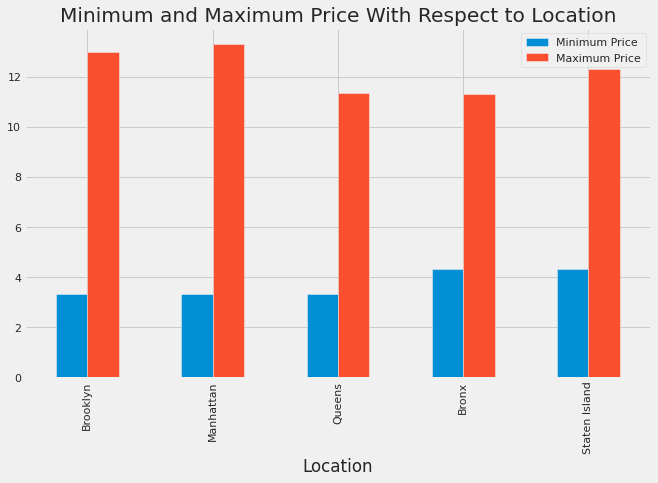

In [ ]:
# Visulaization of maximum price and minimum price ( with respect to location) through bar graph

df_merge_price_copy.plot( x = 'Location', y = ['Minimum Price', 'Maximum Price'], kind = 'bar')
plt.legend(labels = ['Minimum Price', 'Maximum Price'])
plt.title('Minimum and Maximum Price With Respect to Location')
plt.show()


# Observations:

* From the above bar graph, we can observe that the same maximum price for rent is shared by Brooklyn and Manhattan and on the other hand, Queens, Bronx and Staten Island share almost the same maximum price. 
* Bronx and Staten Island also share almost the same minimum price. 
* Brooklyn, Manhattan and Queens stand on the same label as far as the minimum price is concerned.

# Q8. What can we learn from predictions? (ex: locations, prices, reviews, etc.)

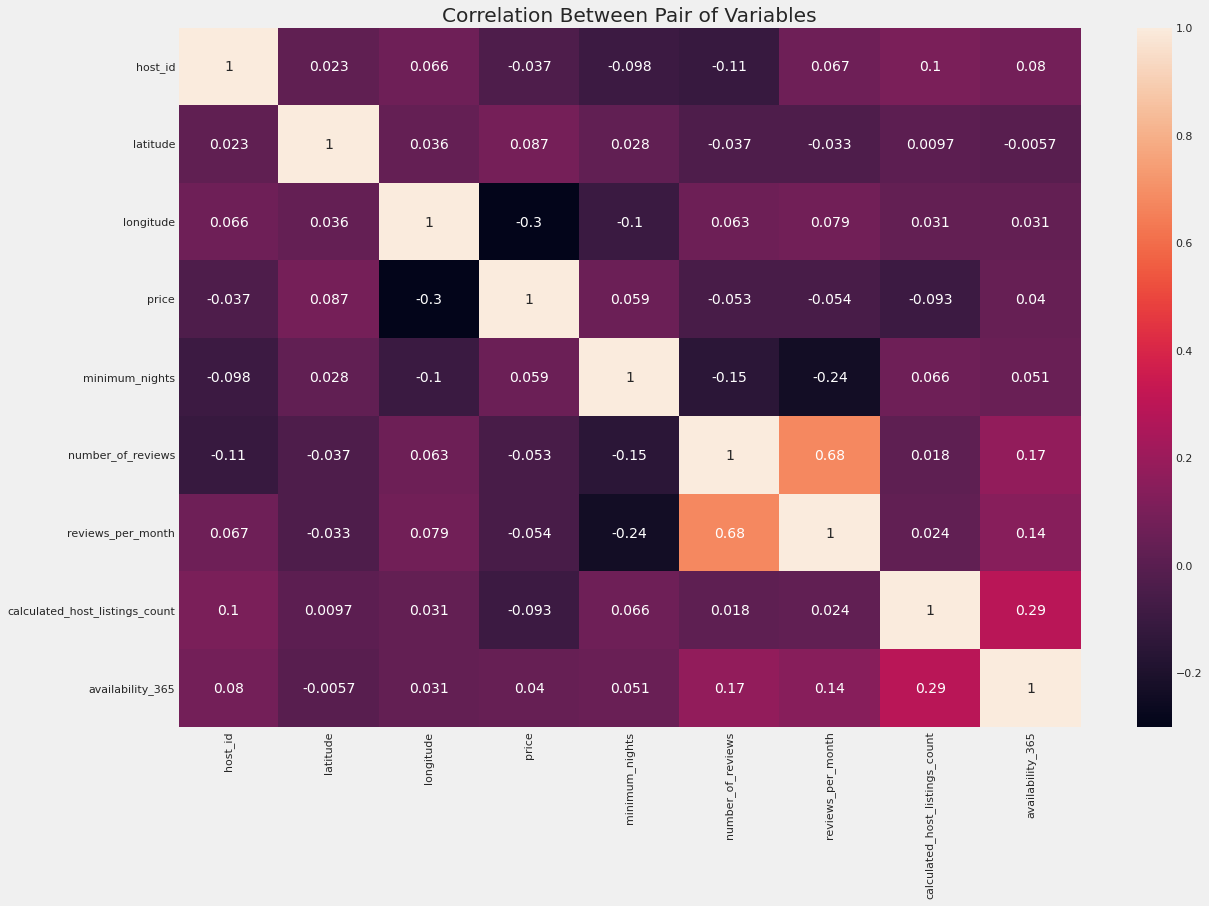

In [ ]:
# Get Correlation between different pair of variables

correlation = df_airbnb_copy.corr(method = 'kendall')
plt.figure(figsize = (18, 12))
plt.title('Correlation Between Pair of Variables')
sns.heatmap(correlation, annot = True)
plt.show()

# Observations :

* From the above graph, we can observe that there is no strong correlation in between variables except between 'number_of_reviews' and 'reviews_per_month'.
* We can try price prediction and reviews prediction with respect to neighbourhood group to get most reviewed listings in New York city.

# Price Prediction

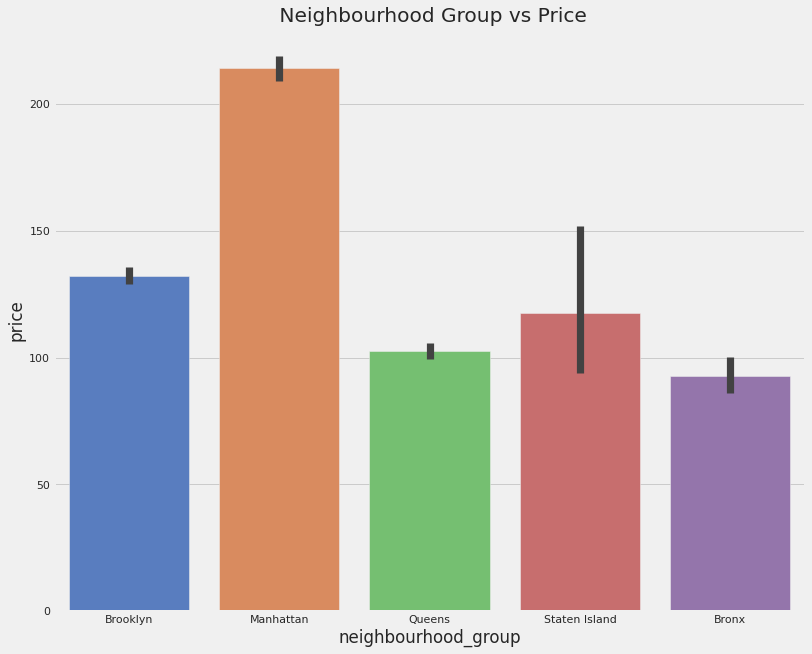

In [ ]:
# Let's plot Neighbourhood Group Vs Price for price prediction
plt.figure(figsize = (12, 10))
plt.title(' Neighbourhood Group vs Price')
sns.barplot(x = df_airbnb_copy.neighbourhood_group, y = df_airbnb_copy.price, palette = 'muted')
plt.show()

# Reviews Prediction

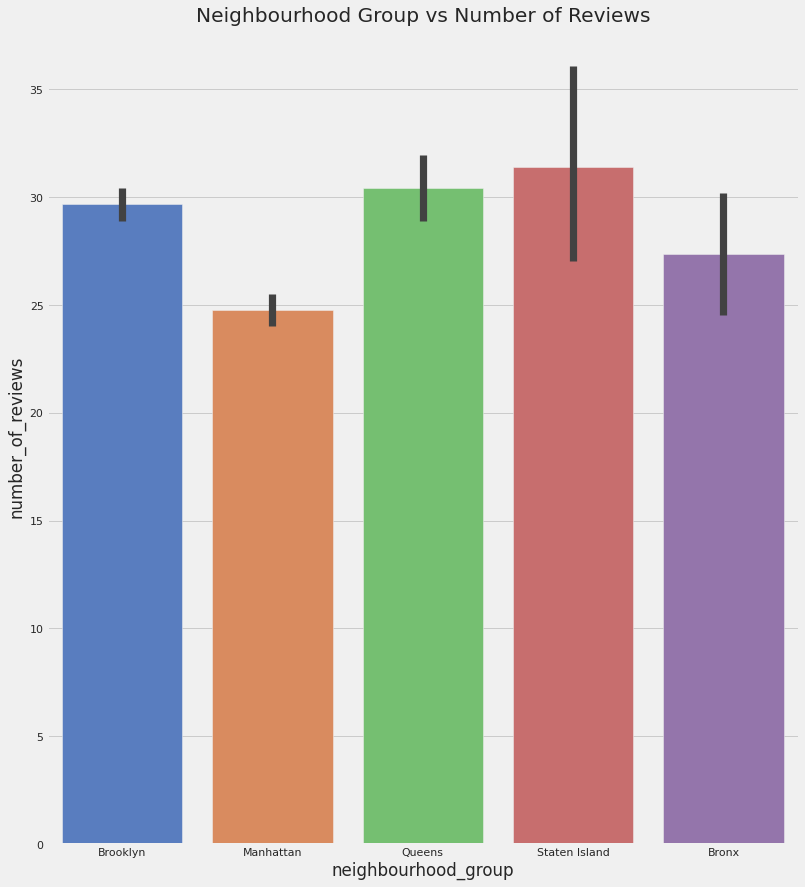

In [ ]:
# Let's plot neighbourhood group vs number of reviews for reviews prediction
plt.figure(figsize = (12,14))
plt.title('Neighbourhood Group vs Number of Reviews')
sns.barplot( x = df_airbnb_copy.neighbourhood_group, y = df_airbnb_copy.number_of_reviews,palette ='muted')
plt.show()

In [ ]:
# Let us take 5 most reviewed listings in New York city

top5_reviewed_listings = df_airbnb_copy.nlargest(5, 'number_of_reviews')
top5_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,65,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,65,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,65,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,65,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,65,1,576,13.40,2,173




Now, we need to calculate the average price of top five reviewed listings from the dataset.

In [ ]:
avg_price = top5_reviewed_listings.price.mean()
print('The average price per night is : {}'.format(avg_price))

The average price per night is : 65.0


# Observations:

From this table, we have the top five reviewed listings in AirBNB dataset and we have the following points to be noted.

* It has the average price of $65

* The top five listings have shared the same price($65).

* Top number of reviews has 629 reviews.

* 5 out of 5 are of 'Private room' type.


# Q9. Find total Number of Nights Spent Per Room Type

In [ ]:
# Find out unique value of room types

df_airbnb_copy['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Converting that array into list

list(df_airbnb_copy['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
# Find out the maximum and minimum nights spent by customers across different room types

tot_room = df_airbnb_copy.groupby('room_type')['minimum_nights'].sum().reset_index()
room_types = tot_room.sort_values('minimum_nights', ascending = True)
room_types.head()

,room_type,minimum_nights
2,Shared room,6752
1,Private room,97617
0,Entire home/apt,183678


In [ ]:
# Create dataset on the basis of room type and minimum nights spent

labels = list(room_types['room_type'])
sizes = list(room_types['minimum_nights'])
# Create colour parameters
colors = ['blue', 'green', 'yellow']
# Create explode
explode = (0.09,0.09,0.09)


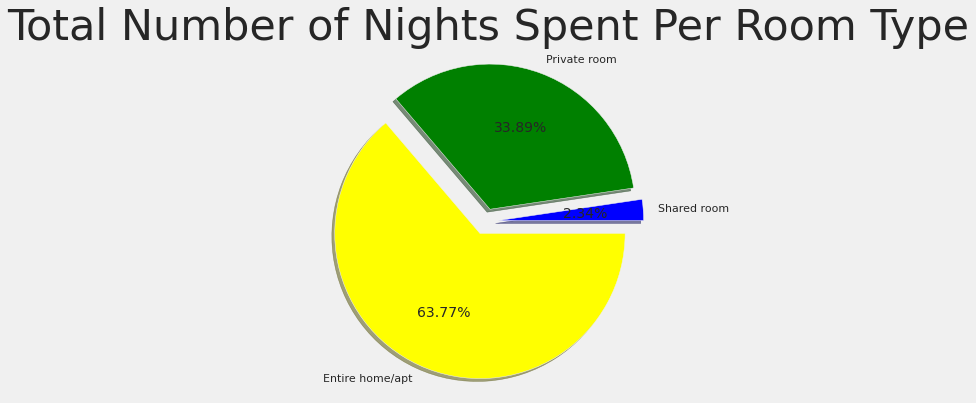

In [ ]:
# Create Pie chart on the basis of room type and minimum nights spent

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.2f%%', shadow = True)
plt.title('Total Number of Nights Spent Per Room Type', fontsize = 43)
plt.axis('equal')
plt.show()

# Observations :

* From the above pie chart, we can observe that in which type of room customers prefer to stay during night time.
* It is visible that almost 64% of customers prefer to stay in Entire home/apt section during night time whereas almost half of that percentage( almost 34%) prefer to spend night in Private room. 
* And the rest almost 2% spend night in Shared room.

# Q10. Find total number of nights spent per location.

In [ ]:
# Find out the maximum and minimum nights spent by customers across different neighbourhood groups

tot_nights = df_airbnb_copy.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index()
final_countdown = tot_nights.sort_values('minimum_nights', ascending = True)
final_countdown.head()

,neighbourhood_group,minimum_nights
4,Staten Island,1693
0,Bronx,4690
3,Queens,25389
1,Brooklyn,96718
2,Manhattan,159557


[Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Bronx'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan')]

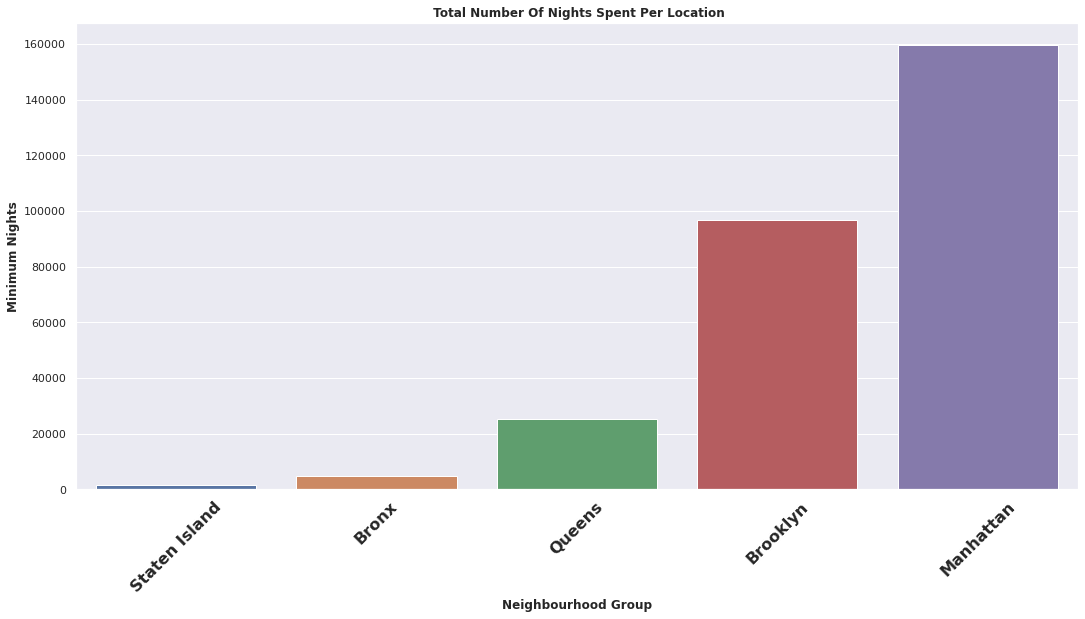

In [ ]:
# Data visualization of total number of nights spent per location by using seaborn library

sns.set(rc = {'figure.figsize': (16,8)})
sns.set_style('darkgrid')
xyz = sns.barplot(x ='neighbourhood_group', y = 'minimum_nights', data = final_countdown)
xyz.set_title(' Total Number Of Nights Spent Per Location', Weight = 'bold')
xyz.set_xlabel('Neighbourhood Group', Weight = 'bold')
xyz.set_ylabel('Minimum Nights', Weight = 'bold')
xyz.set_xticklabels(xyz.get_xticklabels(), Weight = 'bold', rotation = 45, size = '16' )

# Observations:

* The locations from neighbourhood group have been categorised on the basis of total number of minimum nights spent by customers. 

* This bar graph provides an overall idea of which location customers prefer to stay during night time.

* It is visible that customers prefer to stay in Manhattan and Brooklyn to other locations during night time.


#Solution to Business Objective:

My advice to stakeholders would be that the business point of view should not only be restricted within Airbnb dataset of New york city but also should be globalized. The analysis of this dataset is just a pillar to set up their future decisions to extend their business at large as far as the revenue and profit of stakeholders and Airbnb have concerned. This dataset analysis is not the ultimate decider or deciding factor and it should not be. This data analysis might assist the stakeholders and Airbnb in their long-term goals. They can set up different business models as per their requirements because there is no hard and fast rule that these golbal leaders come from technological background rather some percentage do come from non-technological or business background. As to that, they can put forth their innovative ideas or different business models and merge up those ideas with technological data analysis prepared by data analysts or data scientists to bring forth lucrative and more fruitful result in the long run.




# Conclusions:

My conclusion is in connection with those observations from the dataset. This is because if I will provide decisions straight away it might not be digestive for the stakeholders. On the contrary, the stakeholders will absorb the conclusion from business perspectives if I will present it with those observations made in the analysis of the dataset. So, do I over here.

•	Manhattan is the most focused place in New York for hosts to do their business. So, they should add some more features to facilitate their customers and also should focus on the economic or pocket-friendly side of these customers( in terms of promotional or seasonal offers ) at the outset. Once the business model will move on then they can increase the prices and at that point of time the customers will not hesitate to pay a bit more because some previous customers will be there to have the same facilities and amenities and the increased price will not make them that much worried as the customers will have inflation factors in their minds also.

•	Customers pay the highest amount in Brooklyn, Queens and Manhattan that is 10,000 USD and lowest amount is $10. These areas are really good for business but the owners should be mindful of the highest amount and the lowest amount. They can do some shufflings so that they can attract more customers by decreasing the highest amount and the lowest amount shouldn't be that much low as it will lose it's value.

•	'Entire home/apt' room type has the highest number of listings of 52% and ‘Shared room’ is the least listed room type at only 2.7% in total. Well then the onwners or stakeholders need to think about 'Shared room' type of listings as this percentage is too low. As to this they should target more middle-class people with a bit of more facilities. And then this percentage of 'Shared room' listings might go up.

•	People stay for longer duration of time in Private rooms in Brooklyn and Manhattan. From this, it can be concluded that people love spend quality time in those places irrespective of prices(higher and lower). Airbnb should look for more accommodations with more amenities and in that case price on the higher side will not be a negative factor for customers as they will have quality to spend over there eventually.

•	For three types of room type (i.e., Entire home/apt, Shared room, & Private room) average price of 'Entire home/apt' is around 157 USD, for 'Shared room' is around 60 USD and for 'Private room' is around $75. From this point, it can be concluded that'Entire home/apt' should decrease the average price with more amenities so that they can attract more customers irrespective of classes ( Rich/ affluent, upper or lower-middle class) because in foreign countries even the middle class people love to spend their vacations in an expensive way at least once a year and specially during the Christmas and new year's celebration. They would prefer to go to less expensive country beacuse Airbnb does provide the facility to book internationally. From business point of view, this is very crucial for stakeholders to think beyond this New York Airbnb dataset and the thought should be internationalized. And that will reflect in terms of the revenue and growth of that company. That will make a large positive impact in terms of profit of those stakeholders and Airbnb as well.

We have come up at the fag end of the conclusion part. So, ultimate conclusion is that the business point of view should not only be restricted within Airbnb dataset of New york city but also should be globalized. The analysis of this dataset is just a pillar to set up their future decisions to extend their business at large as far as the revenue and profit of stakeholders and Airbnb have concerned. This dataset analysis is not the ultimate decider or deciding factor and it should not be. This data analysis might assist the stakeholders and Airbnb in their long-term goals. They can set up different business models as per their requirements.


